In [29]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm
import os

from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, GRU, SimpleRNN, LSTM, Bidirectional, Activation, TimeDistributed
from keras.layers.convolutional import Conv1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers




In [30]:
class_names=['buildings', 'forest', 'glacier','mountain','sea','street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes=len(class_names)
print(class_names_label)
image_size=(150,150)


{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [31]:
#load dataset
def load_data():
    directory=os.path.abspath("")
    directory=directory + "\dataset"
    #print(directory)
    category=['seg_train','seg_test']
    output=[]
    for eachcategory in category:
        #print(eachcategory)
        path=os.path.join(directory,eachcategory)
        #print(path)
        images=[]
        labels=[]        
        #print('Loading {}'. format(eachcategory) + '...')
        
        for folder in os.listdir(path):
            label=class_names_label[folder]
            for file in os.listdir(os.path.join(path, folder)):
                img_path=os.path.join(os.path.join(path,folder),file)
                #print(img_path)
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,image_size)
                
                images.append(image)
                labels.append(label)
        images=np.array(images, dtype='float32')
        labels=np.array(labels, dtype='int32')
        
        output.append((images,labels))
    return output
print('Data loaded...')

Data loaded...


In [32]:
(train_images, train_labels), (test_images, test_labels) = load_data()
print(len(train_images))

14034


In [33]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
print(len(train_labels))

14034


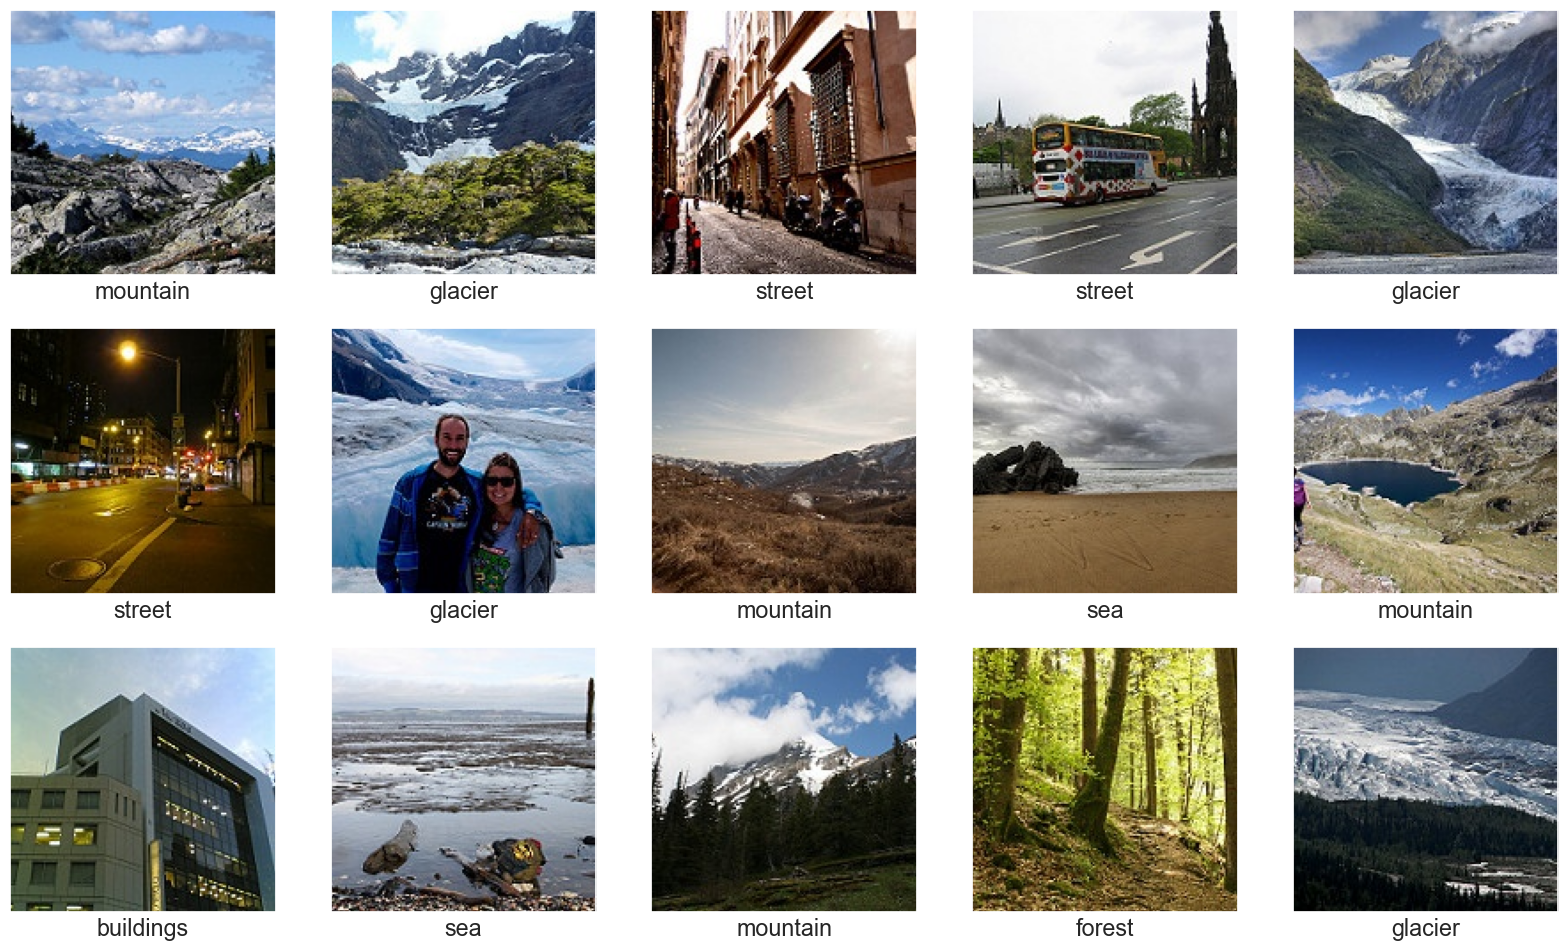

In [34]:
def display_example(class_name, images, labels):
    figsize=(20,20)
    fig=plt.figure(figsize=figsize)
    #fig.subtitle("Some examples of images from the datset", fontsize=16) - deprecated?
    for i in range(15):
        plt.subplot(5,5, i+1)
        plt.yticks([])
        plt.xticks([])
        plt.grid(False)
        #image=cv2.resize(images[i], figsize)
        #plt.imshow(image.astype(np.uint8))
        plt.imshow(images[i].astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
    plt.show()
display_example(class_names,train_images,train_labels)    

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten,
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
])

TypeError: The added layer must be an instance of class Layer. Received: layer=<class 'keras.layers.reshaping.flatten.Flatten'> of type <class 'type'>.

In [ ]:
model.compile(optimizer='admin', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_images, train_labels, batch_size=128,epochs=4,validation_split=0.2)